In [ ]:
import pandas as pd
import ast

# File paths
input_excel_path = r'/content/bangalore_cars.xlsx'
output_csv_path = r'C:\Users\91959\Desktop\Guvi\bangalorecars.csv'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Initialize a dictionary to hold all structured DataFrames
structured_data = {
    'new_car_detail': pd.DataFrame(),
    'new_car_overview': pd.DataFrame(),
    'new_car_feature': pd.DataFrame(),
    'new_car_specs': pd.DataFrame(),
    'car_links': pd.DataFrame()
}

# Process columns with nested data structures
columns_to_process = ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']

for col in columns_to_process:
    flattened_data = []
    for unstructured_data in df[col]:
        flattened_row = flatten_dict(ast.literal_eval(unstructured_data))
        flattened_data.append(flattened_row)
    structured_data[col] = pd.DataFrame(flattened_data)

# Process 'car_links' column (assume it's not nested)
structured_data['car_links'] = df[['car_links']].copy()

# Concatenate all structured DataFrames into one
bangalore_cars_structured = pd.concat(structured_data.values(), axis=1)

# Add the 'City' column with 'Bangalore' as the value
bangalore_cars_structured['City'] = 'Bangalore'

# Save the structured DataFrame to a CSV file
bangalore_cars_structured.to_csv(output_csv_path, index=False)

# Display the structured DataFrame
print(bangalore_cars_structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

In [ ]:
import pandas as pd
import ast

# File paths
input_path = r'/content/chennai_cars.xlsx'
output_path = r'C:\Users\91959\Desktop\Guvi\chennai_cars.csv'

# Load the Excel file
df = pd.read_excel(input_path, engine='openpyxl')

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items()) if isinstance(item, dict) else items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Process and flatten relevant columns
structured_data = {
    col: pd.DataFrame([flatten_dict(ast.literal_eval(x)) for x in df[col]]) for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']
}
structured_data['car_links'] = df[['car_links']].copy()

# Merge all structured DataFrames into one and add 'City' column
chennai_cars_structured = pd.concat(structured_data.values(), axis=1)
chennai_cars_structured['City'] = 'Chennai'

# Save the structured DataFrame to a CSV file
chennai_cars_structured.to_csv(output_path, index=False)

# Display the merged DataFrame
print(chennai_cars_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

In [ ]:
#File paths
input_path = r'/content/delhi_cars.xlsx'
output_path = r'C:\Users\91959\Desktop\Guvi\delhi_cars.csv'

# Load Excel file
df = pd.read_excel(input_path, engine='openpyxl')

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items()) if isinstance(item, dict) else items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Process and flatten relevant columns
structured_data = {
    col: pd.DataFrame([flatten_dict(ast.literal_eval(x)) for x in df[col]]) for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']
}
structured_data['car_links'] = df[['car_links']].copy()

# Merge all structured DataFrames and add 'City' column
delhi_cars_structured = pd.concat(structured_data.values(), axis=1)
delhi_cars_structured['City'] = 'Delhi'

# Save the structured DataFrame to a CSV file
delhi_cars_structured.to_csv(output_path, index=False)

# Display the merged DataFrame
print(delhi_cars_structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

In [ ]:
import pandas as pd
import ast

# Paths to input and output files
input_excel_path = r'/content/hyderabad_cars.xlsx'
output_csv_path = r'C:\Users\91959\Desktop\Guvi\hyderabad_cars.csv'

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Function to process and flatten a specific column
def process_column(df, column_name):
    return pd.DataFrame([
        flatten_dict(ast.literal_eval(data))
        for data in df[column_name].dropna()
    ])

# Load the Excel file into a DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

# Process each relevant column
structured_details_df = process_column(df, 'new_car_detail')
structured_overview_df = process_column(df, 'new_car_overview')
structured_features_df = process_column(df, 'new_car_feature')
structured_specs_df = process_column(df, 'new_car_specs')

# Directly copy the 'car_links' column as it's not nested
structured_links_df = df[['car_links']].copy()

# Combine all structured DataFrames into one
hyderabad_cars_Structured = pd.concat([
    structured_details_df,
    structured_overview_df,
    structured_features_df,
    structured_specs_df,
    structured_links_df
], axis=1)

# Add the 'City' column
hyderabad_cars_Structured['City'] = 'Hyderabad'

# Save the structured DataFrame to a CSV file
hyderabad_cars_Structured.to_csv(output_csv_path, index=False)

# Display the resulting DataFrame
print(hyderabad_cars_Structured)


      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

In [ ]:
import pandas as pd
import ast

# File paths
input_excel_path = r'/content/jaipur_cars.xlsx'
output_csv_path = r'C:\Users\91959\Desktop\Guvi\jaipur_cars.csv'

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Function to process and flatten a specific column
def process_column(df, column_name):
    return pd.DataFrame([
        flatten_dict(ast.literal_eval(data))
        for data in df[column_name].dropna()
    ])

# Load the Excel file into a DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

# Process each relevant column
structured_details_df = process_column(df, 'new_car_detail')
structured_overview_df = process_column(df, 'new_car_overview')
structured_features_df = process_column(df, 'new_car_feature')
structured_specs_df = process_column(df, 'new_car_specs')

# Directly copy the 'car_links' column as it's not nested
structured_links_df = df[['car_links']].copy()

# Combine all structured DataFrames into one
jaipur_cars_Structured = pd.concat([
    structured_details_df,
    structured_overview_df,
    structured_features_df,
    structured_specs_df,
    structured_links_df
], axis=1)

# Add the 'City' column
jaipur_cars_Structured['City'] = 'Jaipur'

# Save the structured DataFrame to a CSV file
jaipur_cars_Structured.to_csv(output_csv_path, index=False)

# Display the resulting DataFrame
print(jaipur_cars_Structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

In [ ]:
import pandas as pd
import ast

# File paths
input_excel_path = r'/content/kolkata_cars.xlsx'
output_csv_path = r'C:\Users\91959\Desktop\Guvi\kolkata_cars.csv'

# Function to flatten nested dictionaries and lists
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Function to process and flatten a specific column
def process_column(df, column_name):
    return pd.DataFrame([
        flatten_dict(ast.literal_eval(data))
        for data in df[column_name].dropna()
    ])

# Load the Excel file into a DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

# Process each relevant column
structured_details_df = process_column(df, 'new_car_detail')
structured_overview_df = process_column(df, 'new_car_overview')
structured_features_df = process_column(df, 'new_car_feature')
structured_specs_df = process_column(df, 'new_car_specs')

# Directly copy the 'car_links' column as it's not nested
structured_links_df = df[['car_links']].copy()

# Combine all structured DataFrames into one
kolkata_cars_Structured = pd.concat([
    structured_details_df,
    structured_overview_df,
    structured_features_df,
    structured_specs_df,
    structured_links_df
], axis=1)

# Add the 'City' column
kolkata_cars_Structured['City'] = 'Kolkata'

# Save the structured DataFrame to a CSV file
kolkata_cars_Structured.to_csv(output_csv_path, index=False)

# Display the resulting DataFrame
print(kolkata_cars_Structured)


      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

In [ ]:
import os
import pandas as pd

# Define file paths for each city's dataset
file_paths = [
    r'/content/C:\Users\91959\Desktop\Guvi\bangalorecars.csv',
    r'/content/C:\Users\91959\Desktop\Guvi\chennai_cars.csv',
    r'/content/C:\Users\91959\Desktop\Guvi\delhi_cars.csv',
    r'/content/C:\Users\91959\Desktop\Guvi\hyderabad_cars.csv',
    r'/content/C:\Users\91959\Desktop\Guvi\jaipur_cars.csv',
    r'/content/C:\Users\91959\Desktop\Guvi\kolkata_cars.csv'
]

# Function to load and concatenate datasets
def load_and_concatenate_datasets(file_paths):
    dataframes = [pd.read_csv(file_path) for file_path in file_paths]
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

# Load and concatenate the data
combined_df = load_and_concatenate_datasets(file_paths)

# Define the output directory and file name for the combined dataset
output_dir = r'/content/C:\Users\91959\Desktop\Guvi\Combined_structured.csv'
output_file = 'car_dekho_Structured.csv'
output_path = os.path.join(output_dir, output_file)

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the combined DataFrame to a CSV file
combined_df.to_csv(output_path, index=False)

print(f"All datasets concatenated and saved to {output_path}")


All datasets concatenated and saved to /content/C:\Users\91959\Desktop\Guvi\Combined_structured.csv/car_dekho_Structured.csv


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
import joblib

# Load the dataset
df = pd.read_csv(
    r'/content/C:\Users\91959\Desktop\Guvi\Combined_structured.csv/car_dheko_Structured.csv',
    low_memory=False
)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price_str = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price_str:
            return float(price_str.replace('Lakh', '').strip()) * 100000
        return float(price_str)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to float
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns with the median
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Drop the redundant 'owner' column
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage_str = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage_str)
        return mileage_float if mileage_float < 100 else np.nan  # Assuming mileage < 100
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats_int = int(str(seats).replace('Seats', '').strip())
        return seats_int if seats_int < 10 else np.nan  # Assuming seats < 10
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)
df['Seats']=df['Seats'].astype(str)
df['ownerNo']=df['ownerNo'].astype(str)
df['modelYear']=df['modelYear'].astype(str)

# Label Encoding for categorical variables
label_encoders = {}

def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = [ 'oem', 'ownerNo', 'model','modelYear', 'variantName','Seats', 'City']
df = label_encode(df, categorical_columns)
cat=['ft', 'bt', 'transmission' ]
df=pd.get_dummies(df,columns=cat,drop_first=True)
# Normalizing numerical features using Min-Max Scaling
scalers = {}

def min_max_scaling(df, columns):

    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

df = min_max_scaling(df, ['km','mileage'])

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]



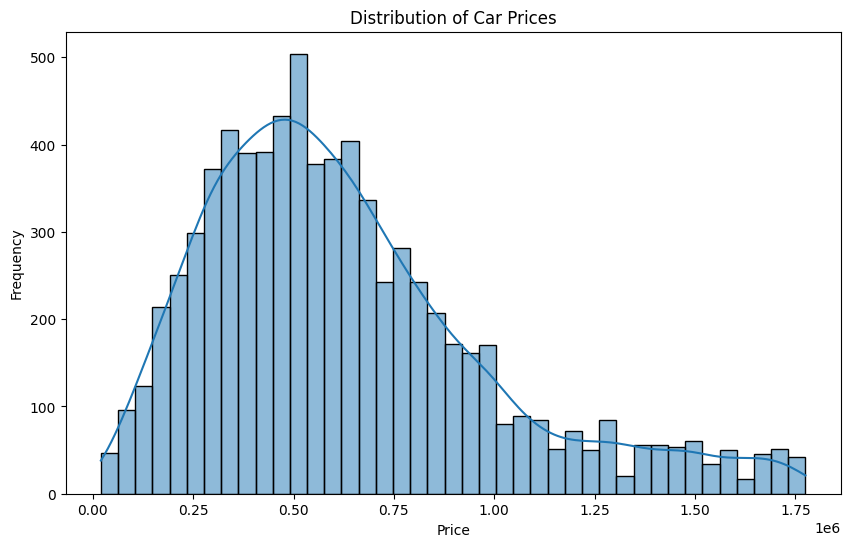

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


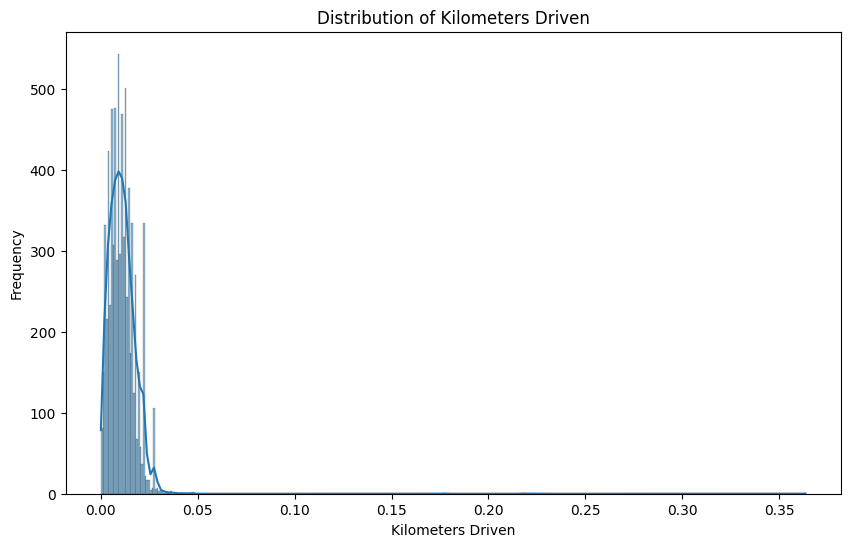

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['km'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

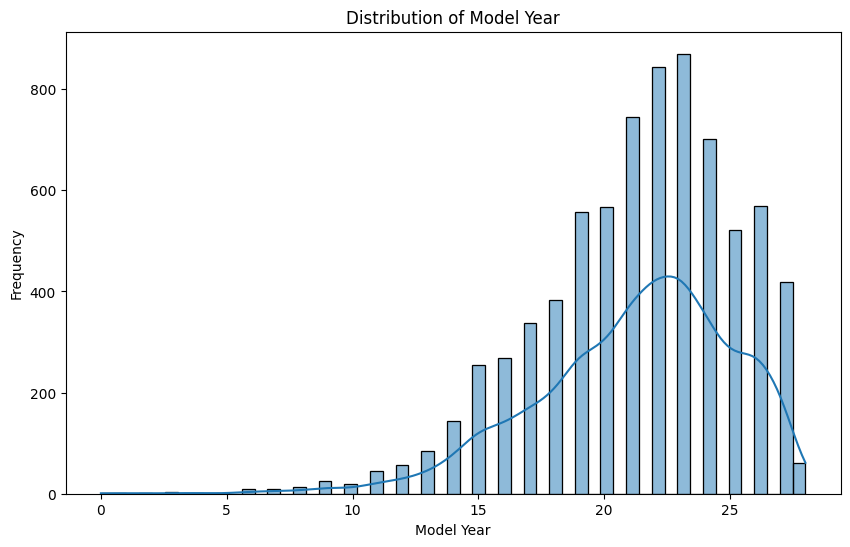

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

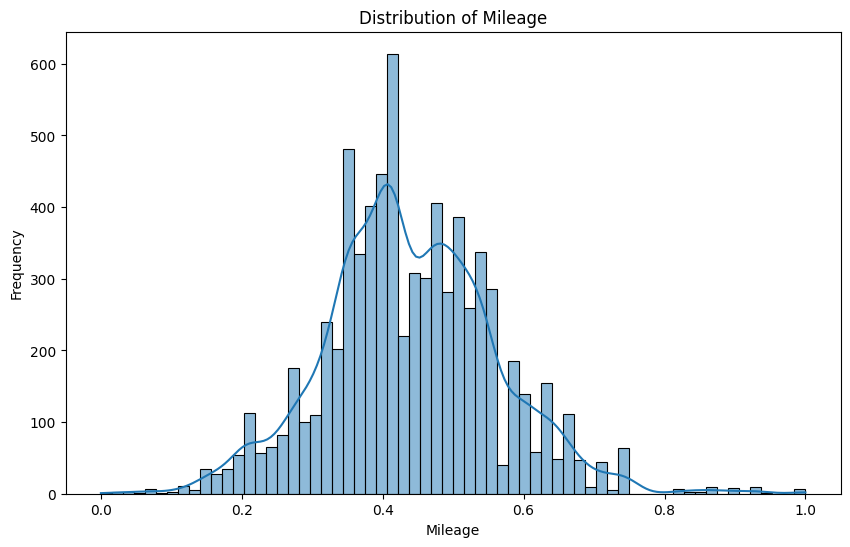

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

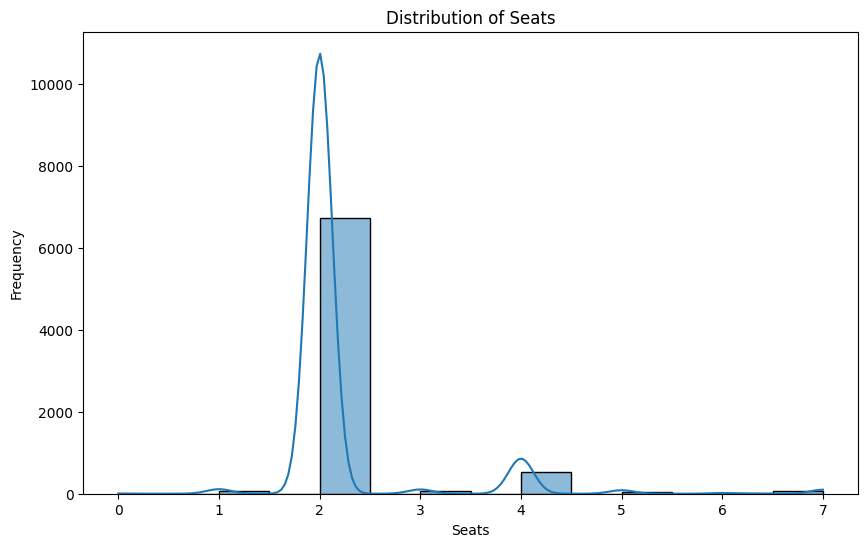

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])

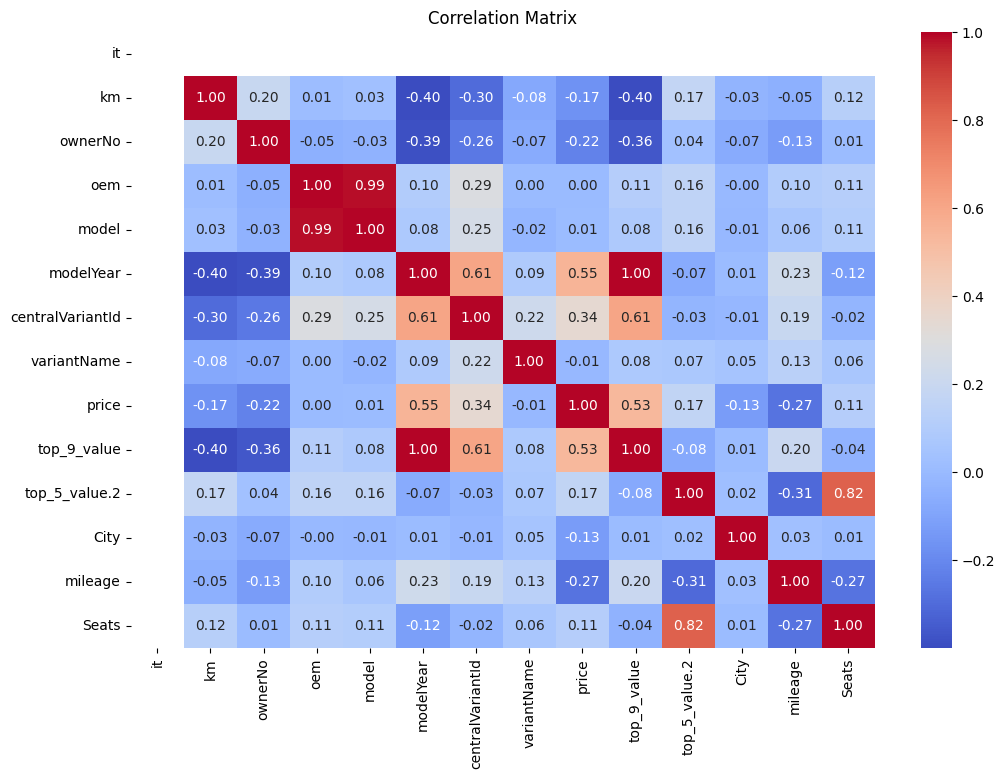

In [ ]:
#Correlation Matrix for the scaled data

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

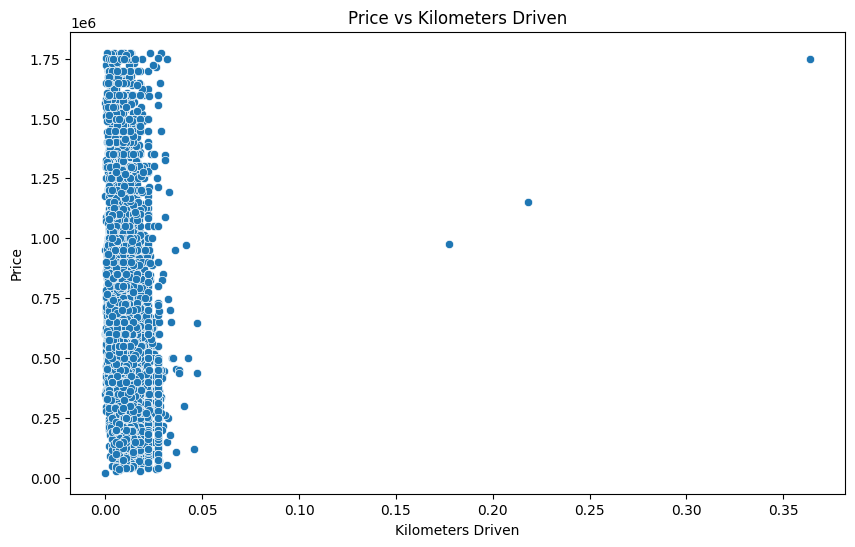

In [ ]:
#Scatter Plot of Price vs Kilometers Driven

plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

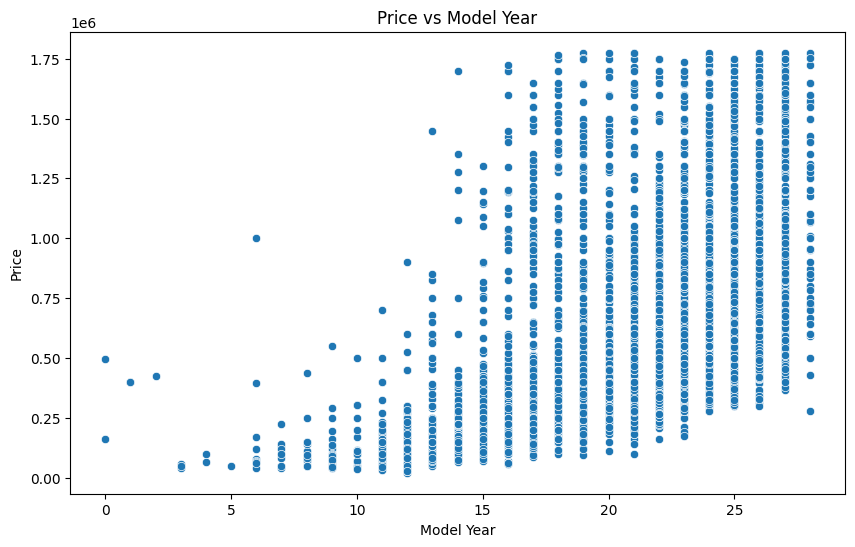

In [ ]:
#Scatter Plot of Price vs Model Year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

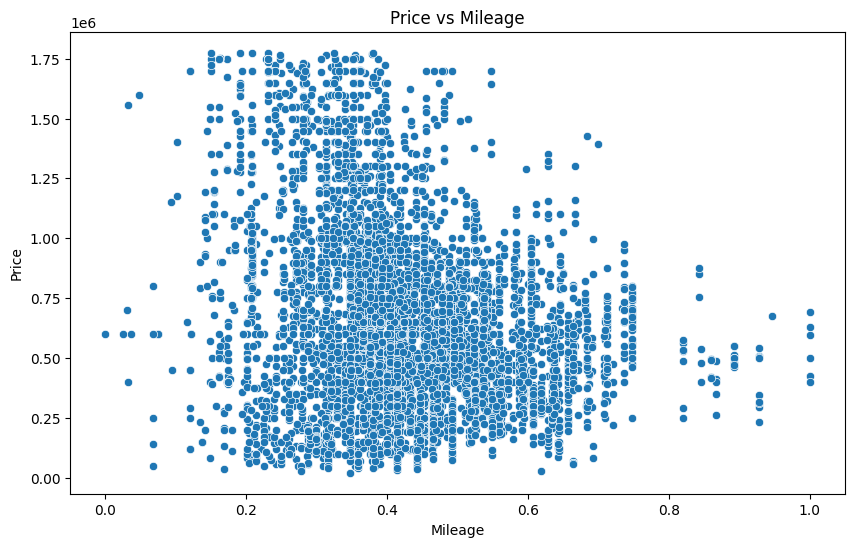

In [ ]:
#Scatter Plot of Price vs Mileage

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

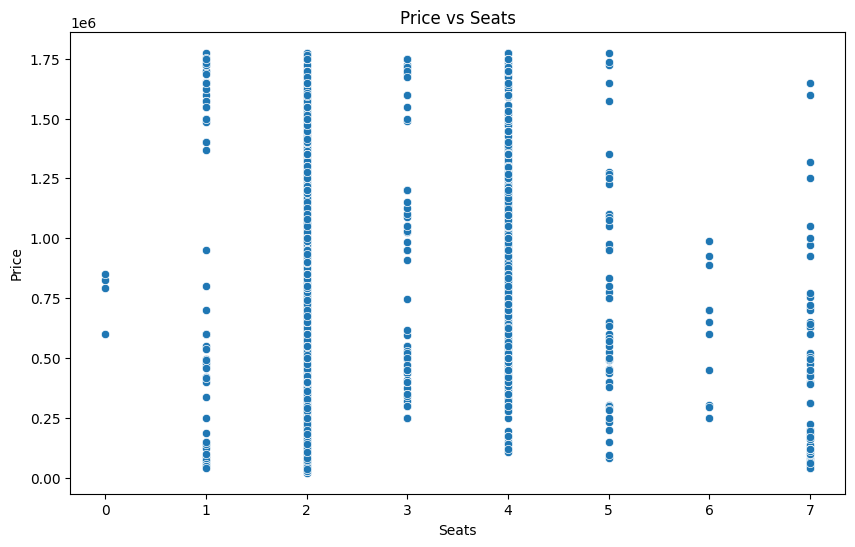

In [ ]:
#Scatter Plot of Price vs Seats

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='price', data=df)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

,0
it,int64
km,float64
ownerNo,int64
oem,int64
model,int64
...,...
bt_Pickup Trucks,bool
bt_SUV,bool
bt_Sedan,bool
bt_Wagon,bool


In [ ]:
#Data Cleaning, No Scaling/Encoding
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'/content/C:\Users\91959\Desktop\Guvi\Combined_structured.csv/car_dekho_Structured.csv')

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        return float(price)
    except (ValueError, TypeError):
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing unwanted characters and converting to float
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns with the median
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column as it's redundant with 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename it to 'mileage'
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        return mileage_float if mileage_float < 100 else np.nan
    except (ValueError, TypeError):
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename it to 'Seats'
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        return seats_int if seats_int < 10 else np.nan
    except (ValueError, TypeError):
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)
df['Seats']=df['Seats'].astype(str)
df['ownerNo']=df['ownerNo'].astype(str)
df['modelYear']=df['modelYear'].astype(str)

# Removing outliers from the 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned dataset
df.to_csv('cardheko_cleaned_dataset_Raw.csv', index=False)



<ipython-input-50-29fe6ed0e8f5>:6: DtypeWarning: Columns (13,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,210,211,212,213,214,215,234,240,242,308,309,310,311,312,313,314,315,316,317,318,319,320,321,323) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/C:\Users\91959\Desktop\Guvi\Combined_structured.csv/car_dekho_Structured.csv')


In [ ]:
import pandas as pd
df = pd.read_csv(r'/content/cardheko_cleaned_dataset_Raw.csv')
df.head()

<ipython-input-51-697aa07b88b0>:2: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/cardheko_cleaned_dataset_Raw.csv')


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,Seats
0,0,Petrol,Hatchback,120000.0,Manual,3,Maruti,Maruti Celerio,2015,3979,...,No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore,23.10,5.0
1,0,Petrol,SUV,32706.0,Manual,2,Ford,Ford Ecosport,2018,6087,...,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,17.00,5.0
2,0,Petrol,Hatchback,11949.0,Manual,1,Tata,Tata Tiago,2018,2983,...,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.84,5.0
3,0,Petrol,Sedan,17794.0,Manual,1,Hyundai,Hyundai Xcent,2014,1867,...,Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore,19.10,5.0
4,0,Diesel,SUV,60000.0,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,...,Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore,23.65,5.0


In [ ]:
selected_columns = ['it', 'ft', 'bt', 'modelYear', 'transmission', 'oem', 'City', 'Seats', 'mileage', 'km', 'price']
d = df[selected_columns]

print(d)

      it      ft         bt  modelYear transmission            oem       City  \
0      0  Petrol  Hatchback       2015       Manual         Maruti  Bangalore   
1      0  Petrol        SUV       2018       Manual           Ford  Bangalore   
2      0  Petrol  Hatchback       2018       Manual           Tata  Bangalore   
3      0  Petrol      Sedan       2014       Manual        Hyundai  Bangalore   
4      0  Diesel        SUV       2015       Manual         Maruti  Bangalore   
...   ..     ...        ...        ...          ...            ...        ...   
7506   0  Petrol  Hatchback       2022       Manual         Maruti    Kolkata   
7507   0  Petrol  Hatchback       2014       Manual         Maruti    Kolkata   
7508   0  Petrol      Sedan       2011    Automatic  Mercedes-Benz    Kolkata   
7509   0  Petrol  Hatchback       2012       Manual         Maruti    Kolkata   
7510   0  Diesel        SUV       2017       Manual        Renault    Kolkata   

      Seats  mileage       

In [ ]:
d.dropna(inplace=True)

<ipython-input-53-b9b984823cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.dropna(inplace=True)


In [ ]:
d

,it,ft,bt,modelYear,transmission,oem,City,Seats,mileage,km,price
0,0,Petrol,Hatchback,2015,Manual,Maruti,Bangalore,5.0,23.10,120000.0,400000.0
1,0,Petrol,SUV,2018,Manual,Ford,Bangalore,5.0,17.00,32706.0,811000.0
2,0,Petrol,Hatchback,2018,Manual,Tata,Bangalore,5.0,23.84,11949.0,585000.0
3,0,Petrol,Sedan,2014,Manual,Hyundai,Bangalore,5.0,19.10,17794.0,462000.0
4,0,Diesel,SUV,2015,Manual,Maruti,Bangalore,5.0,23.65,60000.0,790000.0
...,...,...,...,...,...,...,...,...,...,...,...
7506,0,Petrol,Hatchback,2022,Manual,Maruti,Kolkata,5.0,25.24,10000.0,510000.0
7507,0,Petrol,Hatchback,2014,Manual,Maruti,Kolkata,5.0,22.74,120000.0,180000.0
7508,0,Petrol,Sedan,2011,Automatic,Mercedes-Benz,Kolkata,5.0,11.74,50000.0,550000.0
7509,0,Petrol,Hatchback,2012,Manual,Maruti,Kolkata,5.0,18.50,40000.0,140000.0


In [ ]:
d.to_csv('cardheko_data.csv', index=False)

In [ ]:
#Train-Test Split For Cleaned Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
d=pd.read_csv('cardheko_data.csv')
# Define the feature set (X) and the target variable (y)
features = ['it', 'ft', 'bt', 'modelYear', 'transmission', 'oem', 'City', 'Seats', 'mileage', 'km']
X = d[features]
y = d['price']

# Initialize MinMaxScaler for numeric features
scaler = MinMaxScaler()

# Process categorical and numeric features
for col in X.columns:
    if X[col].dtype == 'object':  # For categorical features
        X = pd.get_dummies(X, columns=[col], drop_first=True)
    else:  # For numeric features
        X[col] = scaler.fit_transform(X[[col]])  # Keep the column as a DataFrame

# Perform the train-test split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (5823, 53)
X_test shape: (1456, 53)


<ipython-input-56-c99d3e0eb214>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = scaler.fit_transform(X[[col]])  # Keep the column as a DataFrame


Linear Regression CV Mean MSE: 4973807845783250245113118075939454976.0000
Linear Regression - MSE: 27498814353.5039, MAE: 117971.8946, R²: 0.7783


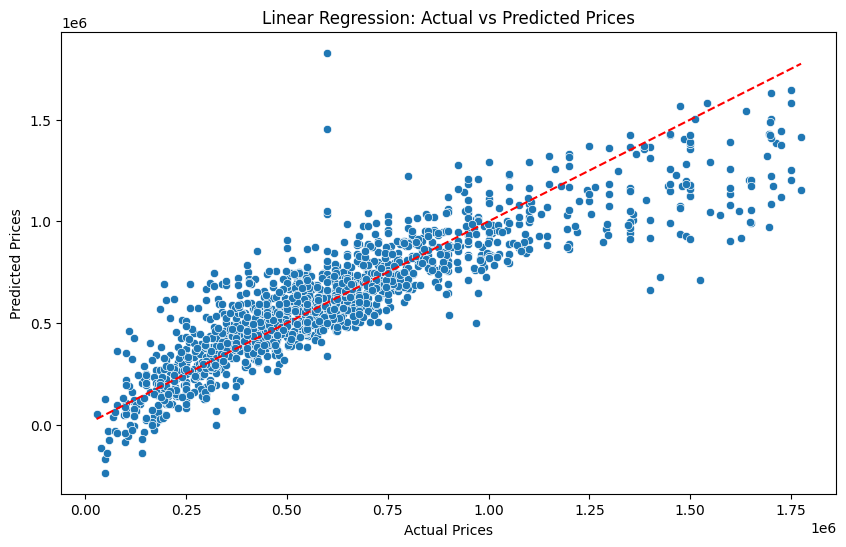

Best Ridge Alpha: 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.624e+13, tolerance: 5.632e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.589e+13, tolerance: 5.506e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.424e+13, tolerance: 5.498e

Best Lasso Alpha: 100


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Handle missing values in features using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation to evaluate model performance
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Linear Regression CV Mean MSE: {mean_cv_mse:.4f}')

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance on the test set
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}')

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso Regression using Grid Search
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge_alpha = ridge_grid.best_params_['alpha']
print(f'Best Ridge Alpha: {best_ridge_alpha}')

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f'Best Lasso Alpha: {best_lasso_alpha}')


Gradient Boosting CV Mean MSE: 22941958247.5279
Gradient Boosting - MSE: 24034714617.6789, MAE: 110052.8103, R²: 0.8062


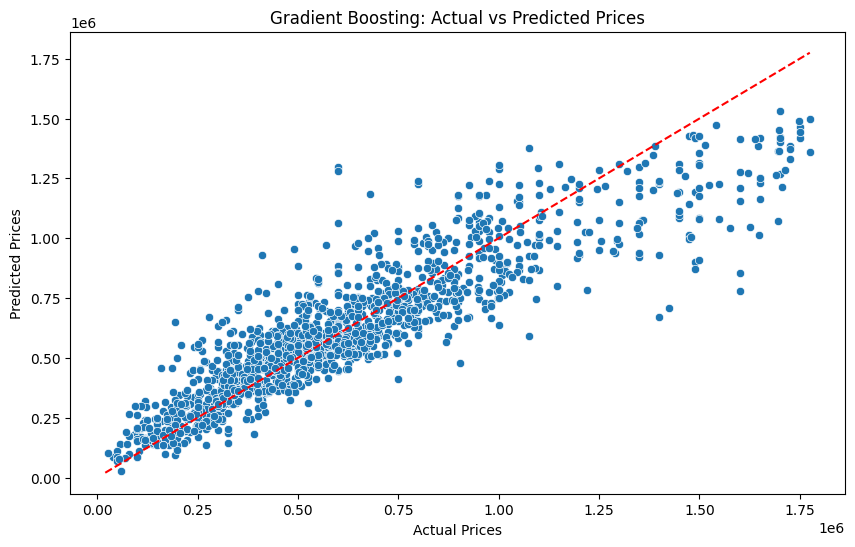

Best Gradient Boosting Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}


In [ ]:
#Gradient Boosting with Cross-Validation and Random Hyperparameter Search

import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns



# Handle missing values in features using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-Test Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation to evaluate model performance
cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Gradient Boosting CV Mean MSE: {mean_cv_mse:.4f}')

# Make predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate model performance on the test set
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr:.4f}, MAE: {mae_gbr:.4f}, R²: {r2_gbr:.4f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

# Hyperparameter Tuning using Randomized Search
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Reduce the number of iterations for faster results (e.g., n_iter=10)
random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_distributions,
    n_iter=10,  # Adjust as needed for a balance between speed and thoroughness
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1  # Utilize all available CPUs for faster computation
)
random_search.fit(X_train, y_train)

# Output the best hyperparameters found
best_params = random_search.best_params_
print(f'Best Gradient Boosting Hyperparameters: {best_params}')


Decision Tree CV Mean MSE: 40404722667.5462
Decision Tree - MSE: 39354952006.1950, MAE: 145075.5092, R²: 0.6827


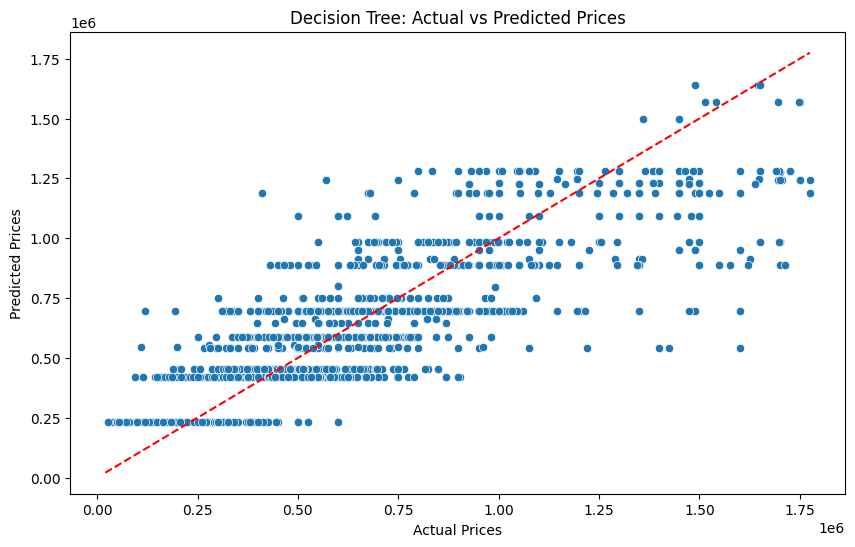

Best Decision Tree Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [ ]:
#Decision Tree with Cross-Validation and Grid Search for Hyperparameter Tuning

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# Handle missing values in features using mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-Test Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model with pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation to evaluate model performance
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Decision Tree CV Mean MSE: {mean_cv_mse:.4f}')

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance on the test set
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt:.4f}, MAE: {mae_dt:.4f}, R²: {r2_dt:.4f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
plt.show()

# Hyperparameter Tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters found
best_params = grid_search.best_params_
print(f'Best Decision Tree Hyperparameters: {best_params}')


Random Forest CV Mean MSE: 17002524440.4878
Random Forest - MSE: 16306766606.7601, MAE: 81651.4485, R²: 0.8685


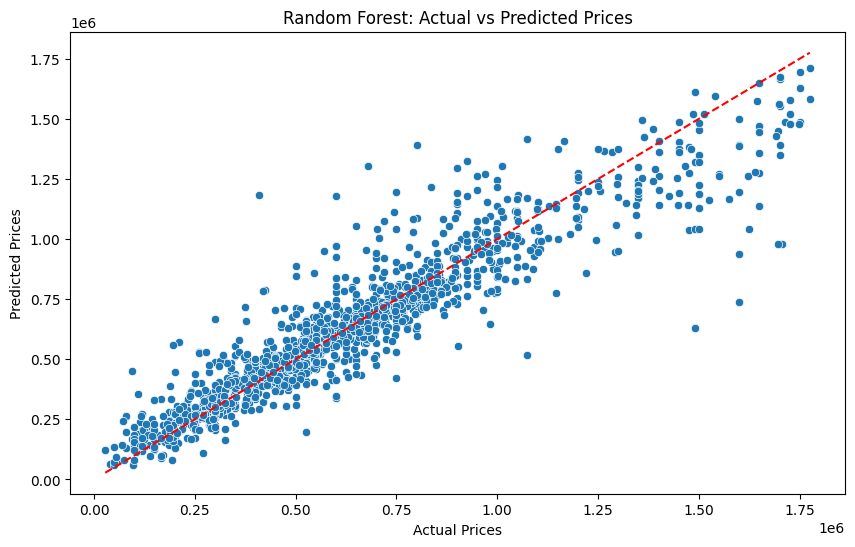

Best Random Forest Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [ ]:
#Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# Handle missing values in features using mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-Test Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model performance using Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f'Random Forest CV Mean MSE: {mean_cv_mse:.4f}')

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance on the test set
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Hyperparameter Tuning using Random Search
rf_param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_distributions,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)
rf_random_search.fit(X_train, y_train)

# Output the best hyperparameters found
best_rf_params = rf_random_search.best_params_
print(f'Best Random Forest Hyperparameters: {best_rf_params}')

In [ ]:
#Summary and Comparison Table

import pandas as pd

# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf]
}

# Create a DataFrame to compare model performance
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df.to_string(index=False))

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.iloc[best_model_idx]

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model['Model']}")
print(f"MSE: {best_model['MSE']:.4f}")
print(f"MAE: {best_model['MAE']:.4f}")
print(f"R²: {best_model['R²']:.4f}")


Model Comparison Table:
            Model          MSE           MAE       R²
Linear Regression 2.749881e+10 117971.894559 0.778272
Gradient Boosting 2.403471e+10 110052.810258 0.806204
    Decision Tree 3.935495e+10 145075.509228 0.682674
    Random Forest 1.630677e+10  81651.448497 0.868516

Best Model Summary:
Best Model: Random Forest
MSE: 16306766606.7601
MAE: 81651.4485
R²: 0.8685


<ipython-input-67-9e31475fa90c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = num_imputer.fit_transform(X[num_cols])
<ipython-input-67-9e31475fa90c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
<ipython-input-67-9e31475fa90c>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Random Forest CV Mean MSE: 16852909780.4145
Random Forest - MSE: 16101916237.0920, MAE: 81080.0753, R²: 0.8702
Training Time: 553.42 seconds
Prediction Time: 0.30 seconds


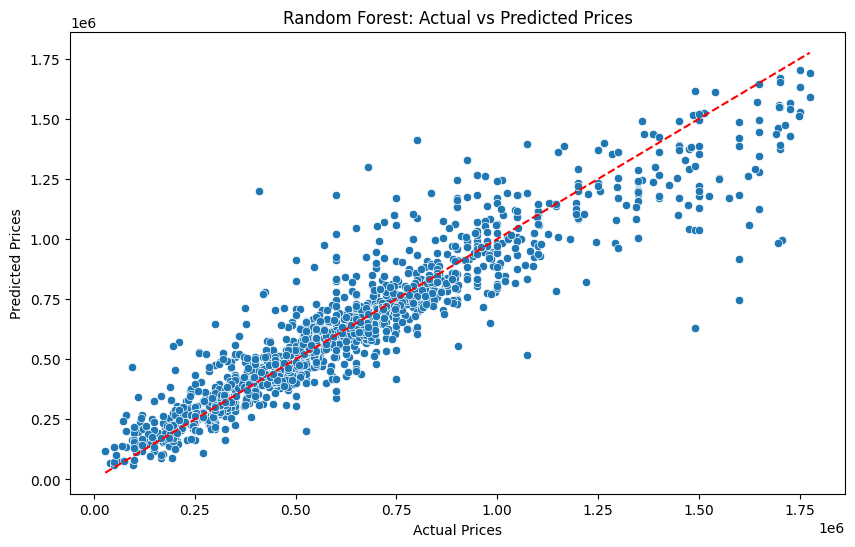

Model training complete. Model saved as '/content/car_price_prediction_model.pkl'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

# Load dataset
d = pd.read_csv(r'/content/cardheko_data.csv')


# Define features and target
features = ['it', 'ft', 'bt', 'modelYear', 'transmission', 'oem', 'City', 'Seats',
            'mileage', 'km']
X = d[features]
y = d['price']

# Impute missing values and preprocess features
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Impute missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Scale numeric features
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=20, cv=5,
    scoring='neg_mean_squared_error', random_state=42
)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean():.4f}')

# Test set predictions
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')
print(f'Training Time: {end_time - start_time:.2f} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time:.2f} seconds')


# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Save the trained model
model_save_path = '/content/car_price_prediction_model.pkl'
joblib.dump(best_rf_model, model_save_path)
print(f"Model training complete. Model saved as '{model_save_path}'.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Random Forest CV Mean MSE: 16360273041.1678
Random Forest - MSE: 15945391334.5280, MAE: 81055.3268, RMSE: 126275.0622, R²: 0.8714
Training Time: 2004.33 seconds
Prediction Time: 0.28 seconds


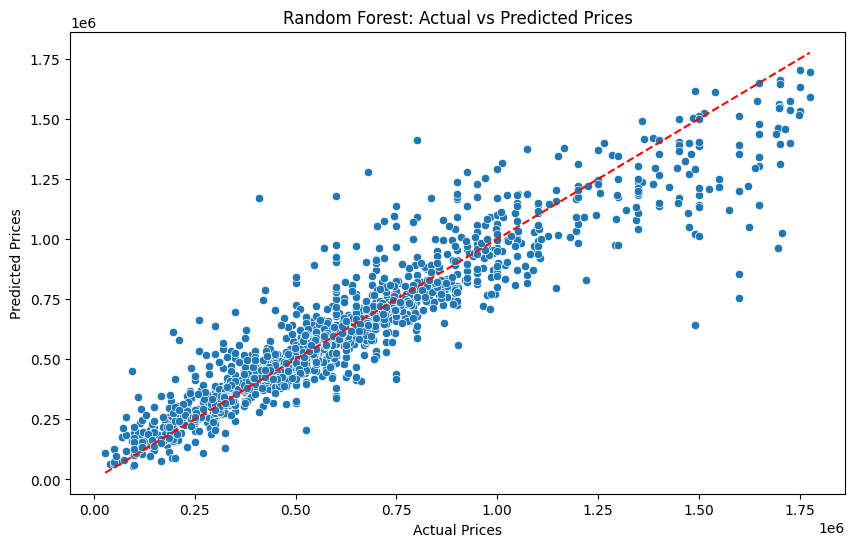

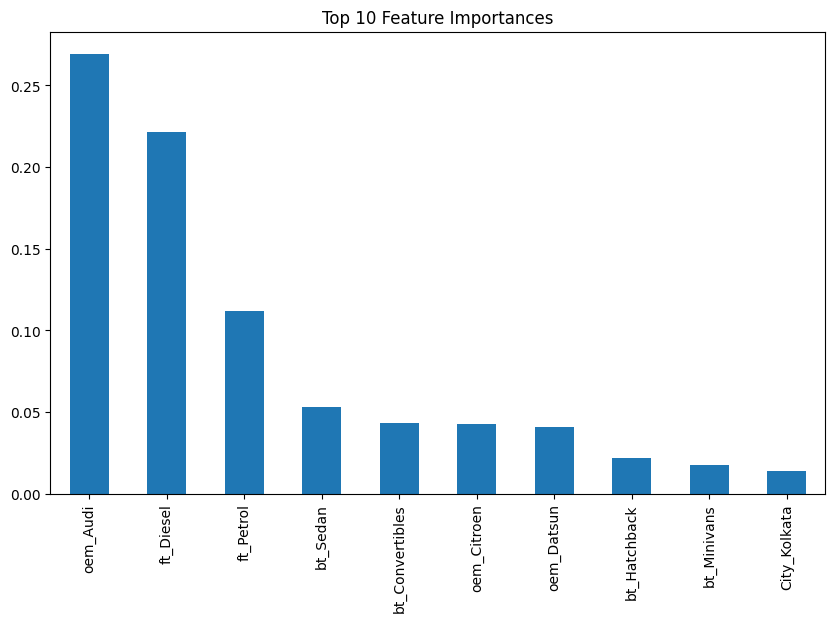

Pipeline training complete. Pipeline saved as '/content/car_price_prediction_pipeline.pkl'.


In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
d = pd.read_csv(r'/content/cardheko_data.csv')

# Define features and target
features = ['it', 'ft', 'bt', 'modelYear', 'transmission', 'oem', 'City', 'Seats', 'mileage', 'km']
X = d[features]
y = d['price']

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), num_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ]
)

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_dist = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Perform Randomized Search
start_time = time.time()
rf_random = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=20, cv=5,
    scoring='neg_mean_squared_error', random_state=42
)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_pipeline = rf_random.best_estimator_

# Cross-validation
rf_cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean():.4f}')

# Test set predictions
start_predict_time = time.time()
y_pred_rf = best_pipeline.predict(X_test)
end_predict_time = time.time()

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}')
print(f'Training Time: {end_time - start_time:.2f} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time:.2f} seconds')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

# Feature importance plot
feature_importances = best_pipeline.named_steps['model'].feature_importances_
feature_names = best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_cols).tolist()
feature_names.extend(num_cols)

sorted_importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

# Save the trained pipeline
try:
    model_save_path = '/content/car_price_prediction_pipeline.pkl'
    joblib.dump(best_pipeline, model_save_path)
    print(f"Pipeline training complete. Pipeline saved as '{model_save_path}'.")
except Exception as e:
    print(f"Error saving pipeline: {e}")
